#The MIT License

Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Data set: https://www.kaggle.com/code/yoojink/employee-attrition-analysis-eda-and-modeling/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/HR Employee Attrition.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Age,43,0,0.0,0,int64
Attrition,2,0,0.0,0,object
BusinessTravel,3,0,0.0,0,object
DailyRate,886,0,0.0,0,int64
Department,3,0,0.0,0,object
DistanceFromHome,29,0,0.0,0,int64
Education,5,0,0.0,0,int64
EducationField,6,0,0.0,0,object
EmployeeCount,1,0,0.0,0,int64
EmployeeNumber,1470,0,0.0,0,int64


From the above table we can see that some features has same value. So, it's better to drop those columns as the probability & distribution will be affected which leads to inaccurate prediction.

In [ ]:
# Dropping columns which are out of scope & unnecessary for prediction

df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


#Converting data types

In [ ]:
#Converting categorical features dtype to int dtype for linear model

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    fields = []
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].values)

In [ ]:
df.replace({'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Y':1,'N':0}, inplace=True)
df['Attrition'].unique()
categoric = df.select_dtypes(include='O')
df = pd.get_dummies(df, columns=[col for col in df.columns if col in categoric])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_df = df.drop(columns=['Attrition'])
X = x_df
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, log_reg_pred)*100

86.73469387755102

#Interpreting coefficients 

In [ ]:
import statsmodels.api as sm
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     10.39
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.68e-42
Time:                        23:02:24   Log-Likelihood:                -310.96
No. Observations:                1029   AIC:                             685.9
Df Residuals:                     997   BIC:                             843.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0039      0.002     -2.381      0.017      -0.007      -0.001
BusinessTravel               0.0017      0.016      0.104      0.917      -0.030       0.033
DailyRate                -1.257e-05   2.59e-05     -0.485      0.628   -6.34e-05    3.83e-05
Department                   0.0372      0.028      1.347      0.178      -0.017       0.091
DistanceFromHome             0.0030      0.001      2.324      0.020       0.000       0.005
Education                    0.0083      0.010      0.804      0.422      -0.012       0.028
EducationField               0.0133      0.008      1.668      0.096      -0.002       0.029
EmployeeCount                0.0001   2.49e-05      4.063      0.000    5.23e-05       0.000
EmployeeNumber            3.583e-06   1.74e-05      0.206      0.836   -3.05e-05    3.76e-05
EnvironmentSatisfaction     -0.0383      0.010     -3.989      0.000      -0.057      -0.019
Gender                       0.0390      0.022      1.815      0.070      -0.003       0.081
HourlyRate                  -0.0002      0.001     -0.445      0.657      -0.001       0.001
JobInvolvement              -0.0582      0.015     -3.922      0.000      -0.087      -0.029
JobLevel                    -0.0211      0.033     -0.636      0.525      -0.086       0.044
JobRole                      0.0033      0.006      0.563      0.574      -0.008       0.015
JobSatisfaction             -0.0385      0.010     -4.017      0.000      -0.057      -0.020
MaritalStatus                0.0847      0.019      4.393      0.000       0.047       0.123
MonthlyIncome            -4.464e-07   7.38e-06     -0.060      0.952   -1.49e-05     1.4e-05
MonthlyRate               4.788e-07   1.49e-06      0.322      0.747   -2.44e-06    3.39e-06
NumCompaniesWorked           0.0220      0.005      4.721      0.000       0.013       0.031
Over18                   -1.184e-16   2.31e-17     -5.123      0.000   -1.64e-16   -7.31e-17
OverTime                     0.2253      0.023      9.703      0.000       0.180       0.271
PercentSalaryHike            0.0008      0.004      0.181      0.856      -0.008       0.010
PerformanceRating           -0.0289      0.045     -0.640      0.522      -0.117       0.060
RelationshipSatisfaction    -0.0177      0.010     -1.819      0.069      -0.037       0.001
StandardHours                0.0081      0.002      4.063      0.000       0.004       0.012
StockOptionLevel            -0.0117      0.016     -0.737      0.461      -0.043       0.019
TotalWorkingYears           -0.0053      0.003     -1.823      0.069      -0.011       0.000
TrainingTimesLastYear       -0.0053      0.008     -0.647      0.518      -0.021       0.011
WorkLifeBalance             -0.0244      0.015     -1.615      0.107      -0.054       0.005
YearsAtCompany

*  By looking at the R-squared & Adj.R-squared values there's not much of a 
difference which indicates that there're no negatively effecting features in our prediction model
* After analysing the f-stat & p-value we can neglect the null hypothesis. Also none of the features has 0 as there T-value 
* Though some features like 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction' has negative t-values but their p-value is <0.05 which again describes that the model is fit & null hypothesis is ignored

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rclf = RandomForestClassifier(n_estimators=250)
rclf.fit(X_train, y_train)
random_pred = rclf.predict(X_test)
rclf.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(random_pred,y_test)*100)
print(metrics.classification_report(random_pred, y_test))
# ConfusionMatrixDisplay.from_predictions(random_pred, y_test, cmap = 'Blues')

Accuracy: 88.43537414965986
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       289
           1       0.13      1.00      0.23         5

    accuracy                           0.88       294
   macro avg       0.56      0.94      0.58       294
weighted avg       0.99      0.88      0.93       294



* After tuning the model with different test sizes & n_estimators this model performed better with 80/20 split & with 250 trees. Our accuracy is 88% which better than shown in Auto ML prediction 86%

#Interpreting the Random Forest Model 

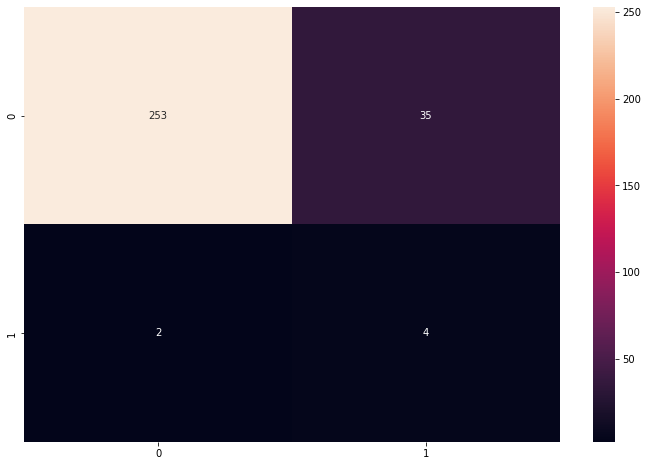

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12,8))
pred = rclf.predict(X_test)
cm = confusion_matrix(pred, y_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.show()

* From the above plot we can see that our model has predicted '0' for 253/255 from the test data & '1' for 35/4. Which means our model says that the chances of employee leaves a company is more than what data actually signifies.
* This variation in data is because the nodes are randomly selected in random forest classification based on feature importance.

#Installing Lazy Predict for Auto ML

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Auto ML for finding the best models

In [108]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values('Accuracy', ascending=False))

100%|██████████| 29/29 [00:05<00:00,  5.67it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.89               0.65     0.65      0.87   
XGBClassifier                      0.89               0.63     0.63      0.87   
LinearSVC                          0.89               0.61     0.61      0.86   
LGBMClassifier                     0.89               0.61     0.61      0.86   
RidgeClassifier                    0.89               0.58     0.58      0.85   
RidgeClassifierCV                  0.88               0.56     0.56      0.84   
CalibratedClassifierCV             0.88               0.59     0.59      0.85   
SVC                                0.88               0.56     0.56      0.84   
LinearDiscriminantAnalysis         0.88               0.64     0.64      0.86   
ExtraTreesClassifier               0.88               0.55     0.55      0.83   
KNeighborsClassifier        

#Installing shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.5 MB/s 


# Shap Analysis for Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(log_reg_model.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 442it [00:14,  8.90it/s]                         


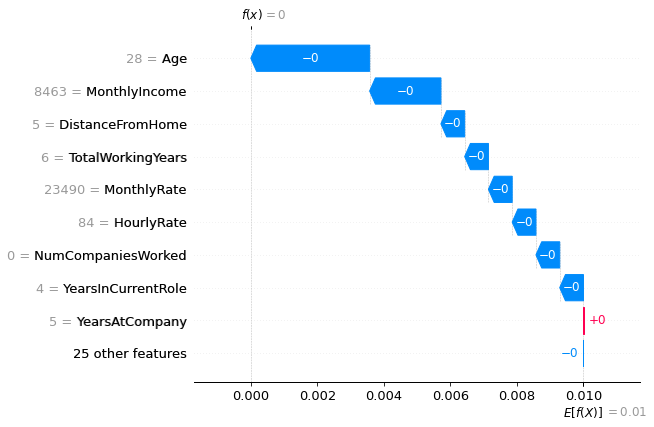

In [ ]:
sample_feature_importance(0, 'waterfall')

* None of the feature shows the negative effect on the model interpretability

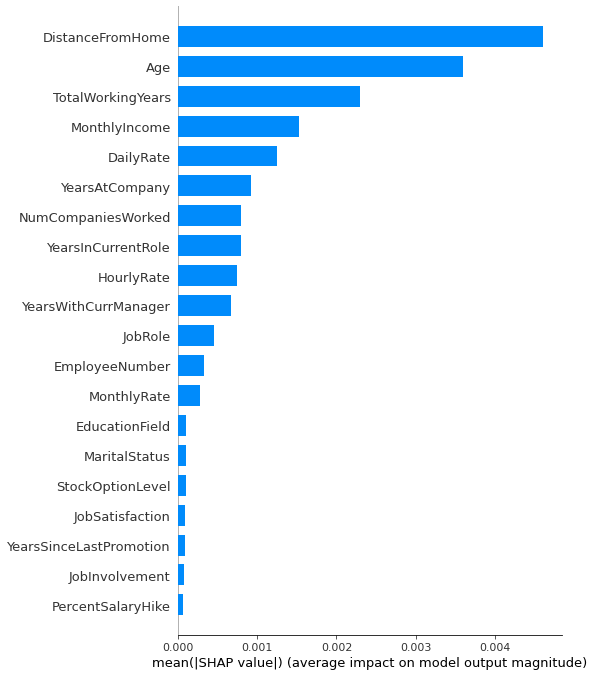

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

The feature like DistanceFromHome, Age, TotalWorkingYears, MonthlyIncome shown the major impact for prediction on our Logistic Regression Model.

#Shap Analysis for Random forest

In [ ]:
import shap
shap.initjs()

In [ ]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(rclf.predict, X_train)
shap_values = explainer(X_test)

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

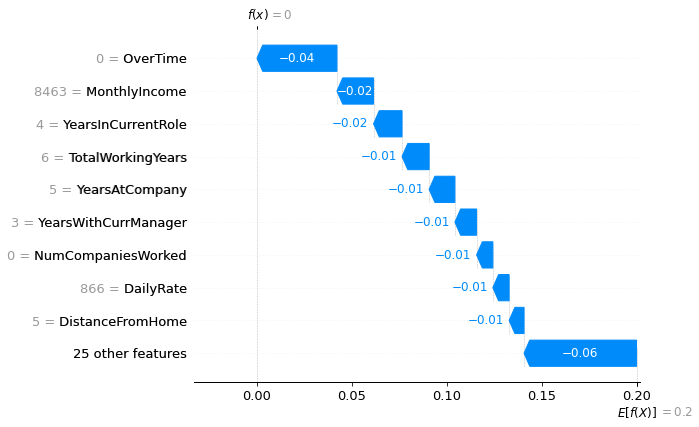

In [ ]:
sample_feature_importance(0, 'waterfall')

* None of the feature shows the negative effect on the model interpretability

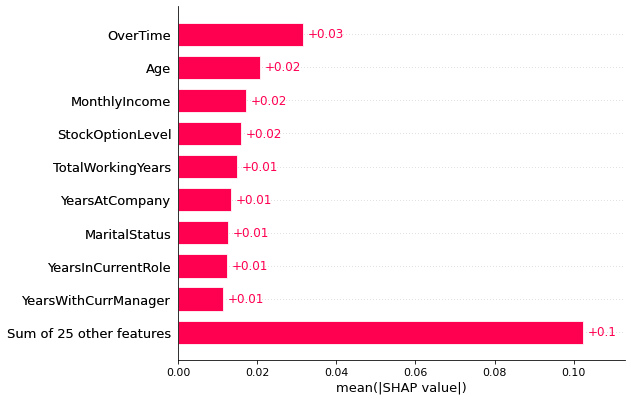

In [ ]:
shap.plots.bar(shap_values)

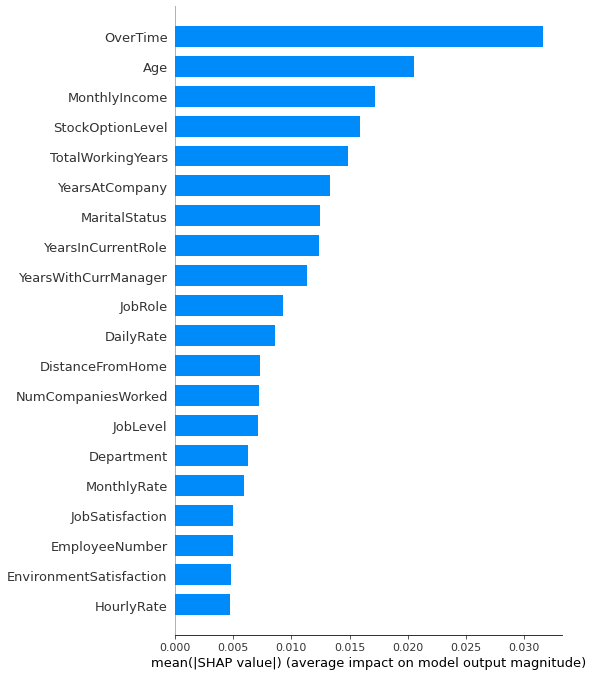

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

The feature like OverTime, Age, MonthlyIncome, StockOptionLevel, TotalWorkingYears shown the major impact for prediction on our Fandom Forest Model.

# Comparing shap values between models

* DistanceFromHome, Age, TotalWorkingYears, MonthlyIncome are important features in prediction for logistic regression where as OverTime, Age, MonthlyIncome, StockOptionLevel, TotalWorkingYears are important features for random forest model.
* Age & TotalWorkingYears are common top contributors in both models
* By accuracy wise random forest model(88.4%) performed better compared to logistic regression(86.7)
* Shap values helped in visualising the feature importance for both the models